In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'
   .format(name=fn,length=len(uploaded[fn])))

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
User uploaded file "Google_Stock_Price_Test.csv" with length 1029 bytes


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'
   .format(name=fn,length=len(uploaded[fn])))

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv
User uploaded file "Google_Stock_Price_Train.csv" with length 63488 bytes


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

#Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [10]:
#part 2 - Building the RNN

#Import the keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Dro[out regilarisation
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
#fitting data
regressor.fit(X_train,y_train,epochs = 100,batch_size = 32)





Epoch 1/100
38/38 [==============================] - 11s 117ms/step - loss: 0.0309
Epoch 2/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0041
Epoch 13/100

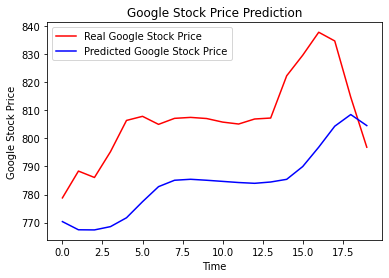

In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
   X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualising the results
plt.plot(real_stock_price, color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [13]:
predicted_stock_price

array([[770.36346],
       [767.45105],
       [767.4035 ],
       [768.5759 ],
       [771.729  ],
       [777.45154],
       [782.815  ],
       [785.0924 ],
       [785.4376 ],
       [785.0926 ],
       [784.6891 ],
       [784.2831 ],
       [784.00214],
       [784.46893],
       [785.42206],
       [789.971  ],
       [796.8733 ],
       [804.3401 ],
       [808.4945 ],
       [804.565  ]], dtype=float32)